## Linear Regression

Simple example to show linear regression using `scikit-learn`.

We will fit a 10D function on the diabetes dataset.

The diabetes dataset is made of:

Samples total: 442

Dimensionality: 10

Features: 
- real, -.2 < x < .2

Targets:
- integer 25 - 346

This the 1st machine learning example. We show the ff:

input ----> model ----> output

To train the model, we create a train split of the dataset. Then, we validate the trained model using test split. The model performance is measured using the test split.


Let us first import the modules.

In [64]:
# Modified from code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


### Diabetes dataset

Let us download and examine the dataset.

In [65]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print("X shape:", diabetes_X.shape)
print("Y shape:", diabetes_y.shape)

X shape: (442, 10)
Y shape: (442,)


### Train & test: input and output data
Generate train and test splits

In [67]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

### Model
The linear regression object in `scikit-learn`

In [68]:
regr = linear_model.LinearRegression()

### Model training using train split

Train the model using the train dataset by calling `fit()`

In [69]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

### Model validation using test split
Validate the trained model using the test dataset.

In [70]:
diabetes_y_pred = regr.predict(diabetes_X_test)

### Performance metrics:  `r2_score`, MSE and regression coefficients
`r2_score`: 1.0 (perfect predictions) or 0.0 (imperfect predictions) 

In [71]:
print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))


Coefficients: 
 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]
Mean squared error: 2004.57
Coefficient of determination: 0.59


### Finally, visualization of test results
Visualize the data and fitted curve. We use the 1st two dimensions of the input.

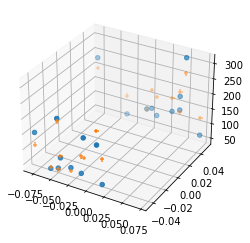

In [72]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

X = diabetes_X_test[:,0:1]
Y = diabetes_X_test[:,1:2]
Z = diabetes_y_test
Z = np.reshape(Z, (-1,1))
ax.scatter(X, Y, Z, marker='o')

Z = diabetes_y_pred
Z = np.reshape(Z, (-1,1))
ax.scatter(X, Y, Z, marker='+')

plt.show()